In [2]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /opt/anaconda3/lib/python3.7/site-packages (1.2.1)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
ls

DIs(改).xlsx
Diamonds_feature_importance.ipynb
Sulfide数据.xlsx
carbonates_non_parametric_test_probability_plot.ipynb
diamonds_similarity_kernel_onlyMineral.ipynb
微量7000（去斜杠）.xlsx


In [3]:
df_raw = pd.read_excel("DIs(改).xlsx")
df_raw.head()

,Unnamed: 0,ID,DOI,Reference,location,location comment,craton,GPS Location,sample,mineral（Diamond/Inclusion/Sulfide）,Si(wt.%),Ti(wt.%),Al(wt.%),Cr(wt.%),V(wt.%),Mn(wt.%),Mg(wt.%),Ca(wt.%),Sr(wt.%),Ba(wt.%),Na(wt.%),P(wt.%),K(wt.%),Cl(wt.%),Fe(wt.%),Co(wt.%),Ni(wt.%),Cu(wt.%),S(wt.%),Zn(wt.%),Pb(wt.%),O(wt.%),Total,δ 34S(‰),(Ni+Co)/Fe,Cu/metals,Re,Os,187Re/188Os,Method（主量）,Comment（Inclusion/Sulfide）,Cr,V,Co,Ni,Cu,Zn,Ga,As,Se,Mo,Ag,Cd,In,Sn,Sb,Te,Wl,Hg,Tl,Bi,Ru,Pd,Re.1,Os.1,Ir,Pt,Au,Rb,Sr,Y,Zr,Nb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Yb,Lu,Hf,Ta,W,Pb,Th,U,Ti,Tb,Tm,Sc,Fe,Fe2+,Fe3+,Li,B,Na,Al,K,Ca,Mn,Ge,Be,Mg,Si,S,Cl,F,P,Diamond_Method,Inclusion_Method
0,0,760.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,761.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,762.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,763.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-65,Cpx,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,764.0,NaN,2009_liu_Lithos,"Udachnaya kimberlite, Siberia",NaN,Siberia,E112/N66,D-73,Cpx,26.086853,0.359640,6.82926,0.041052,0.0,0.038720,4.554,8.00016,0.0,0.0,4.903959,0.0,0.165958,NaN,3.756677,0.0,0.0,NaN,0.0,0.0,NaN,45.202917,99.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [4]:
df_raw['Method（主量）'].unique()

array([nan, 'EDS', 'electron microprobe', 'EPMA',
       ' EDS (Energy Dispersive X-ray Spectrometry) ',
       'MAC-400 eleotron probe', 'EPMA,SIMS', 'microprobe analysis ',
       'ELECTRON-MICROPROBE ANALYSES',
       'Electron probe micro analysis (EPMA)', 'EDS analysis ',
       'automated MAC 500 electron microprobe with standards that were analyzed minerals and glasses.',
       'microprobe analysis', 'EMPA', 'EMP', 'Mossbauer spectroscopy'],
      dtype=object)

In [5]:
df_raw['Comment（Inclusion/Sulfide）'].unique()

array([nan, 'Sf', 'fPer', 'Garnet', 'Clinopyroxene', 'Titanite',
       'Inclusion', 'Sulfide', 'Grt', 'Ol', 'Px', 'Phl', 'Ri', 'Sanidine',
       'Rt', 'ilm', 'Spl', 'Cal', 'Srp', 'Fe-Ni', 'Cohenite', 'Troilite',
       'Mean of the inclusion points'], dtype=object)

In [6]:
df = df_raw.copy()
df.shape

(3309, 117)

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'DOI', 'Reference', 'location', 'location comment',
       'craton', 'GPS Location', 'sample',
       'mineral（Diamond/Inclusion/Sulfide）',
       ...
       'Ge', 'Be', 'Mg', 'Si', 'S', 'Cl', 'F', 'P', 'Diamond_Method',
       'Inclusion_Method'],
      dtype='object', length=117)

In [8]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(3309, 102)

In [9]:
df.drop(['Unnamed: 0', 'ID', 'DOI', 'Reference', 'location', 'location comment', 'location',  'GPS Location',
         'Diamond_Method', 'Inclusion_Method', 'sample', 'mineral（Diamond/Inclusion/Sulfide）', 
        'Method（主量）', 'Comment（Inclusion/Sulfide）'], 
        axis = 1, inplace=True)
df.shape

(3309, 89)

In [10]:
df.head()

,craton,Si(wt.%),Ti(wt.%),Al(wt.%),Cr(wt.%),V(wt.%),Mn(wt.%),Mg(wt.%),Ca(wt.%),Sr(wt.%),Ba(wt.%),Na(wt.%),P(wt.%),K(wt.%),Cl(wt.%),Fe(wt.%),Co(wt.%),Ni(wt.%),Cu(wt.%),S(wt.%),Zn(wt.%),Pb(wt.%),O(wt.%),Total,Re,Os,187Re/188Os,Cr,V,Co,Ni,Cu,Zn,Ga,As,Mo,Cd,Sn,Tl,Ru,Re.1,Os.1,Au,Rb,Sr,Y,Zr,Nb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Yb,Lu,Hf,Ta,Pb,Th,U,Ti,Tb,Tm,Sc,Fe,Fe2+,Fe3+,Li,B,Na,Al,K,Ca,Mn,Ge,Be,Mg,Si,S,Cl,F,P
0,Siberia,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Siberia,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Siberia,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Siberia,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Siberia,26.086853,0.359640,6.82926,0.041052,0.0,0.038720,4.554,8.00016,0.0,0.0,4.903959,0.0,0.165958,NaN,3.756677,0.0,0.0,NaN,0.0,0.0,NaN,45.202917,99.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.craton.value_counts()

Kaapvaal                                    744
Siberia                                     555
Slave                                       300
Superior                                    214
Amazonia                                    211
Congo                                       179
Guyana                                      145
West Africa                                 140
Zimbabwe                                    120
North Australian                            104
Unknown                                      80
Guinea                                       76
Wyoming                                      69
Kalahari                                     67
alluvial                                     67
Sino–Korean                                  57
Kaapvaal                                     47
Africa                                       41
Tasmanide Orogen                             19
Induchina and Sibumasu                       16
the Namibian coast                      

In [54]:
df.craton.nunique()

27

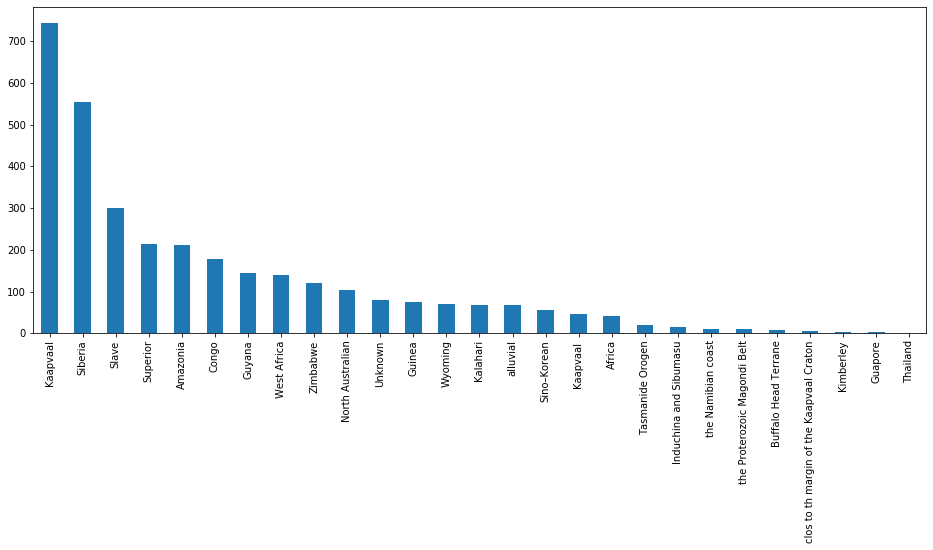

In [12]:
plt.figure(figsize=(16, 6))
df.craton.value_counts().plot(kind = 'bar')

### 先测试Kaapvaal 、Siberia、 Slave三个 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 89 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   craton       3291 non-null   object 
 1   Si(wt.%)     2771 non-null   float64
 2   Ti(wt.%)     2494 non-null   float64
 3   Al(wt.%)     2642 non-null   float64
 4   Cr(wt.%)     2641 non-null   float64
 5   V(wt.%)      780 non-null    float64
 6   Mn(wt.%)     2691 non-null   float64
 7   Mg(wt.%)     2804 non-null   float64
 8   Ca(wt.%)     2535 non-null   float64
 9   Sr(wt.%)     687 non-null    float64
 10  Ba(wt.%)     717 non-null    float64
 11  Na(wt.%)     2371 non-null   float64
 12  P(wt.%)      1259 non-null   float64
 13  K(wt.%)      2051 non-null   float64
 14  Cl(wt.%)     154 non-null    float64
 15  Fe(wt.%)     2973 non-null   float64
 16  Co(wt.%)     921 non-null    float64
 17  Ni(wt.%)     2274 non-null   float64
 18  Cu(wt.%)     254 non-null    float64
 19  S(wt.%

# Why set to 0.008?

In [14]:
df.loc[df.Ni == '＜0.01', 'Ni'] = 0.008

In [15]:
df[['Ni']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ni      361 non-null    object
dtypes: object(1)
memory usage: 26.0+ KB


In [16]:
df['Ni'] = df.Ni.astype('float')

In [17]:
df[['Ni']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ni      361 non-null    float64
dtypes: float64(1)
memory usage: 26.0 KB


In [18]:
df3 = df[df['craton'].isin(['Kaapvaal', 'Siberia', 'Slave'])]
df3.shape

(1599, 89)

### Split data into craton and elements

In [19]:
cratons = df3.craton.values
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
features = df3.drop(['craton'], axis=1)
features.shape

(1599, 88)

In [22]:
features.head()

,Si(wt.%),Ti(wt.%),Al(wt.%),Cr(wt.%),V(wt.%),Mn(wt.%),Mg(wt.%),Ca(wt.%),Sr(wt.%),Ba(wt.%),Na(wt.%),P(wt.%),K(wt.%),Cl(wt.%),Fe(wt.%),Co(wt.%),Ni(wt.%),Cu(wt.%),S(wt.%),Zn(wt.%),Pb(wt.%),O(wt.%),Total,Re,Os,187Re/188Os,Cr,V,Co,Ni,Cu,Zn,Ga,As,Mo,Cd,Sn,Tl,Ru,Re.1,Os.1,Au,Rb,Sr,Y,Zr,Nb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Dy,Ho,Er,Yb,Lu,Hf,Ta,Pb,Th,U,Ti,Tb,Tm,Sc,Fe,Fe2+,Fe3+,Li,B,Na,Al,K,Ca,Mn,Ge,Be,Mg,Si,S,Cl,F,P
0,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.993519,0.287712,6.45868,0.020526,0.0,0.054208,4.998,7.92873,0.0,0.0,4.651713,0.0,0.265533,NaN,4.067789,0.0,0.0,NaN,0.0,0.0,NaN,45.002821,99.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.086853,0.359640,6.82926,0.041052,0.0,0.038720,4.554,8.00016,0.0,0.0,4.903959,0.0,0.165958,NaN,3.756677,0.0,0.0,NaN,0.0,0.0,NaN,45.202917,99.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ========= some issues ========================================

In [23]:
features.columns

Index(['Si(wt.%)', 'Ti(wt.%)', 'Al(wt.%)', 'Cr(wt.%)', 'V(wt.%)', 'Mn(wt.%)',
       'Mg(wt.%)', 'Ca(wt.%)', 'Sr(wt.%)', 'Ba(wt.%)', 'Na(wt.%)', 'P(wt.%)',
       'K(wt.%)', 'Cl(wt.%)', 'Fe(wt.%)', 'Co(wt.%)', 'Ni(wt.%)', 'Cu(wt.%)',
       'S(wt.%)', 'Zn(wt.%)', 'Pb(wt.%)', 'O(wt.%)', 'Total', 'Re', 'Os',
       '187Re/188Os', 'Cr', 'V', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'As', 'Mo',
       'Cd', 'Sn', 'Tl', 'Ru', 'Re.1', 'Os.1', 'Au', 'Rb', 'Sr', 'Y', 'Zr',
       'Nb', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Dy', 'Ho',
       'Er', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U', 'Ti', 'Tb', 'Tm', 'Sc',
       'Fe', 'Fe2+', 'Fe3+', 'Li', 'B', 'Na', 'Al', 'K', 'Ca', 'Mn', 'Ge',
       'Be', 'Mg', 'Si', 'S', 'Cl', 'F', 'P'],
      dtype='object')

In [24]:
check_old = ['Si(wt.%)', 'Ti(wt.%)', 'Al(wt.%)', 'Cr(wt.%)', 'V(wt.%)', 'Mn(wt.%)',
       'Mg(wt.%)', 'Ca(wt.%)', 'Sr(wt.%)', 'Ba(wt.%)', 'Na(wt.%)', 'P(wt.%)',
       'K(wt.%)', 'Cl(wt.%)', 'Fe(wt.%)', 'Co(wt.%)', 'Ni(wt.%)', 'Cu(wt.%)',
       'S(wt.%)', 'Zn(wt.%)', 'O(wt.%)', 'Cr', 'V', 'Co', 'Ni', 'Cu', 'Zn',
       'Ga', 'As', 'Mo', 'Cd', 'Sb', 'Ru', 'Pd', 'Re.1', 'Ir', 'Pt', 'Au',
       'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Dy', 'Ho', 'Er', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U',
       'Ti', 'Tb', 'Tm', 'Sc', 'Fe', 'Li', 'Na', 'Al', 'K', 'Ca', 'Mn', 'Ge',
       'Mg', 'Si', 'S', 'Cl', 'P']
check_new = features.columns.values

In [25]:
set(check_old) - set(check_new) # elements in old data but not in new data

{'Ir', 'Pd', 'Pt', 'Sb'}

In [26]:
set(check_new) - set(check_old) # elements in new data but not in old data

{'187Re/188Os',
 'B',
 'Be',
 'F',
 'Fe2+',
 'Fe3+',
 'Os',
 'Os.1',
 'Pb(wt.%)',
 'Re',
 'Sn',
 'Tl',
 'Total'}

### ========= some issues ========================================

In [27]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=90)

In [28]:
def print_results(y_true, y_pred, dataset):
    print(dataset,'-- R2: {0}, Accuracy Score: {1}'.format(r2_score(y_true, y_pred), 
                                                              accuracy_score(y_true, y_pred)))

### Split into training set and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 88), (320, 88), (1279,), (320,))

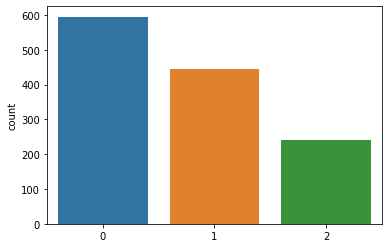

In [30]:
sns.countplot(y_train)

### XGBoost

In [31]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

In [32]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [33]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.8588849878729287, Accuracy Score: 0.965625


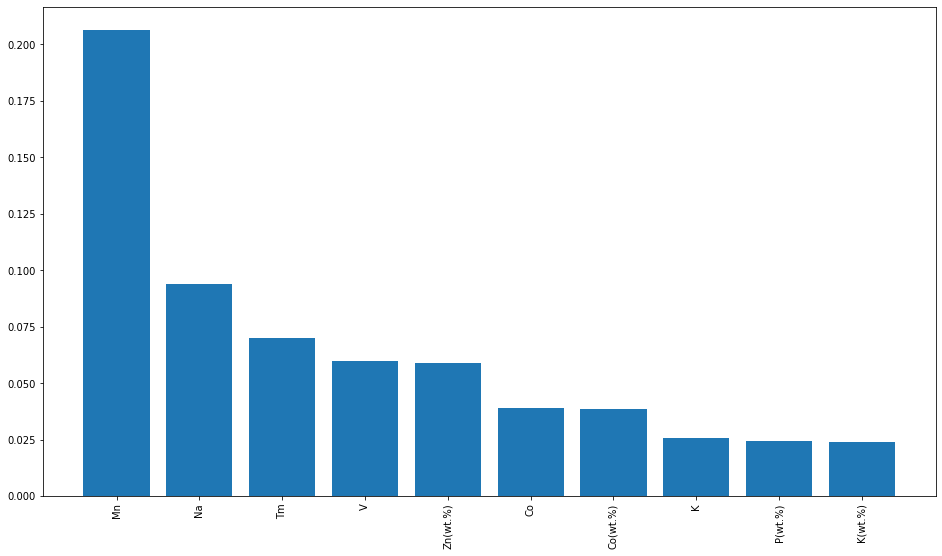

In [34]:
plot_importance(features, xg, 10)

In [35]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 3, 
#                     eval_metric = 'merror', seed=2020)

In [36]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 3, 
                    eval_metric = 'merror', seed=2020)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [37]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [38]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.8588849878729287, Accuracy Score: 0.965625


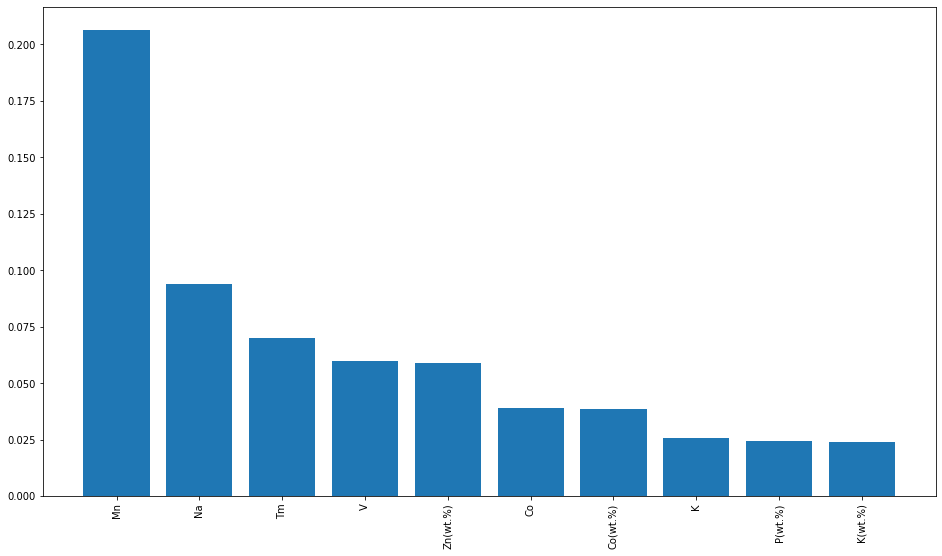

In [39]:
plot_importance(features, xgb, 10)

### Model Optimization

In [40]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [41]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [42]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [43]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 3, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [44]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=3,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [45]:
xgb_cv.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 7}

In [46]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [47]:
xgb_cv.best_score_

0.9476286764705882

In [48]:
xgb_best = xgb_cv.best_estimator_

In [49]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [50]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9891373123553517, Accuracy Score: 0.9960906958561376


In [51]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.7991824827422446, Accuracy Score: 0.940625


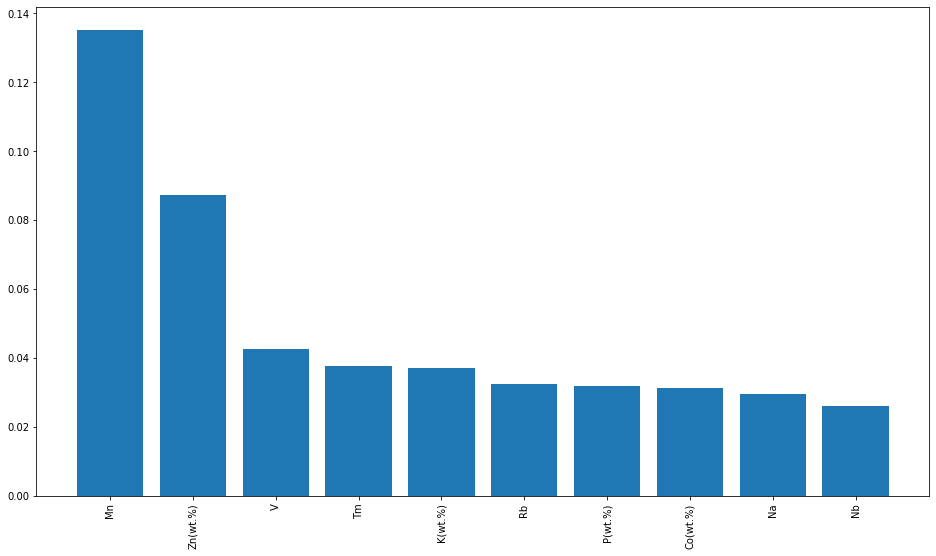

In [52]:
plot_importance(features, xgb_best, 10)

### ============ Save the best model ==================================

In [73]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 3, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.01, gamma = 1, max_depth = 7, seed=2020)
xgb_best.fit(X_train, y_train)

XGBClassifier(eta=0.01, eval_metric='merror', gamma=1, max_depth=7, num_class=3,
              objective='multi:softprob', seed=2020, tree_method='hist')

In [74]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [75]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9904951483109328, Accuracy Score: 0.99687255668491


In [76]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.7937549822758188, Accuracy Score: 0.946875


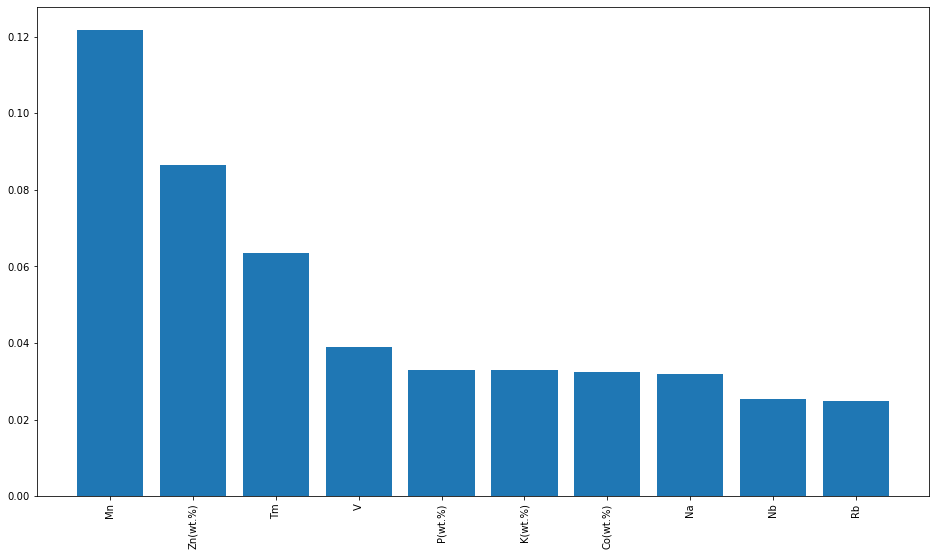

In [77]:
plot_importance(features, xgb_best, 10)

In [42]:
# with open('diamonds_xgb_gridsearchbest.pkl', 'wb') as f:
#     pickle.dump(xgb_best, f)

In [78]:
import shap

In [81]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)


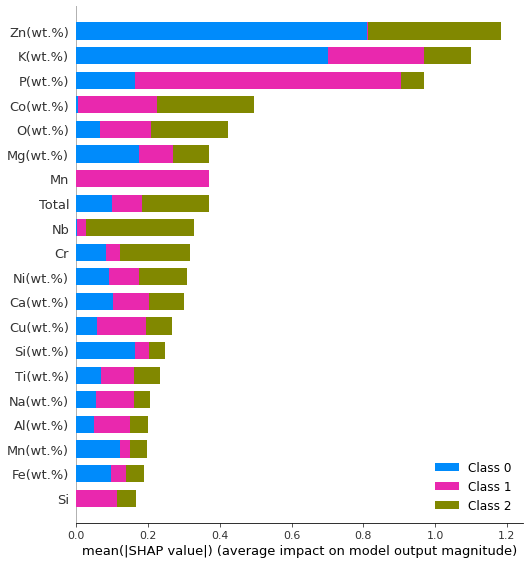

In [91]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")